In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##importing dataset

In [2]:
customers_df = pd.read_csv('/content/Customers.csv')
products_df = pd.read_csv('/content/Products.csv')
transactions_df = pd.read_csv('/content/Transactions.csv')

In [3]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

##cleaning dataset

In [20]:
print("Missing Values:\n")
print(customers_df.isnull().sum(), "\n")
print(products_df.isnull().sum(), "\n")
print(transactions_df.isnull().sum(), "\n")

Missing Values:

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64 

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64 

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64 



In [5]:
print("Duplicate Rows:\n")
print(f"Customers Duplicates: {customers_df.duplicated().sum()}")
print(f"Products Duplicates: {products_df.duplicated().sum()}")
print(f"Transactions Duplicates: {transactions_df.duplicated().sum()}")

Duplicate Rows:

Customers Duplicates: 0
Products Duplicates: 0
Transactions Duplicates: 0


##Customer Distribution by Region

<ipython-input-6-22c5a3a60167>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")


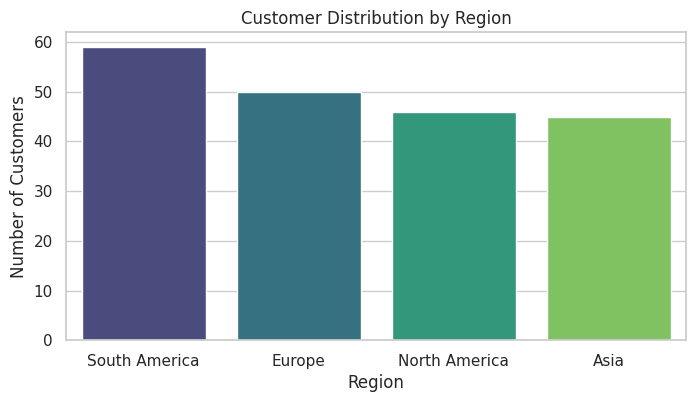

In [6]:
region_counts = customers_df['Region'].value_counts()
plt.figure(figsize=(8, 4))
sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.show()

##Product Distribution by Category

<ipython-input-7-6bcfdee84e61>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="coolwarm")


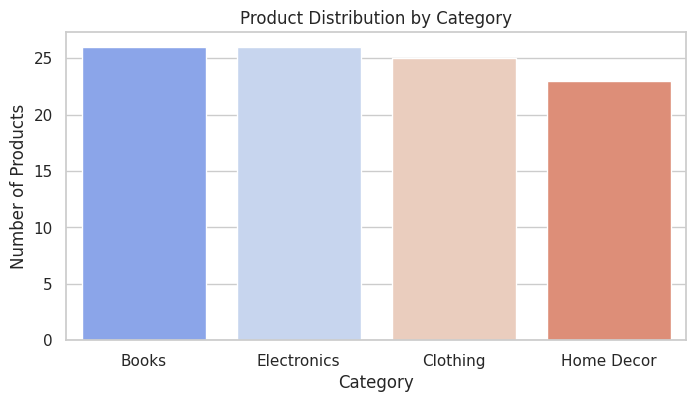

In [7]:
category_counts = products_df['Category'].value_counts()
plt.figure(figsize=(8, 4))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="coolwarm")
plt.title("Product Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.show()

##Price Distribution of Products

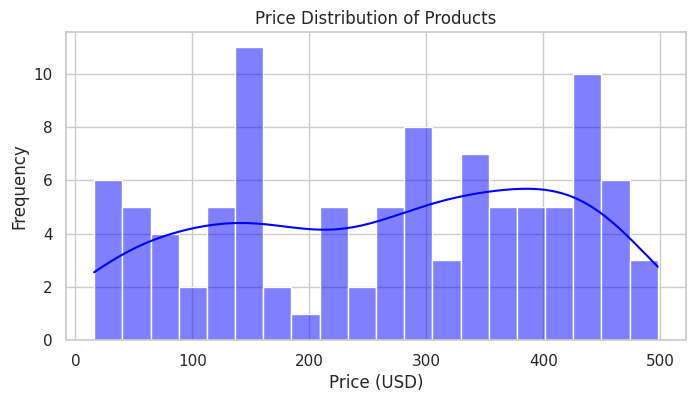

In [8]:
plt.figure(figsize=(8, 4))
sns.histplot(products_df['Price'], bins=20, kde=True, color='blue')
plt.title("Price Distribution of Products")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()

##Total Transaction Value Distribution

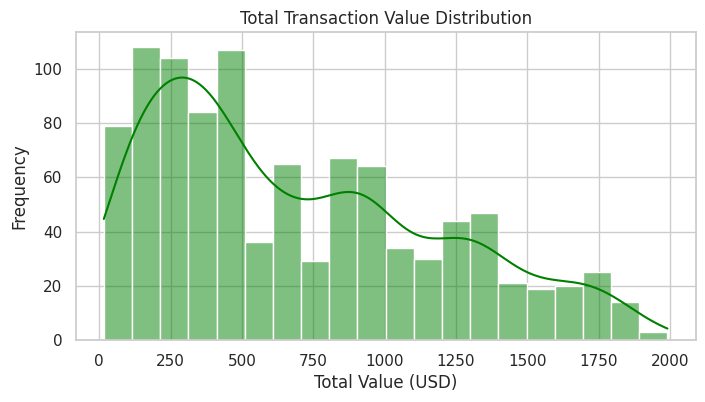

In [9]:
plt.figure(figsize=(8, 4))
sns.histplot(transactions_df['TotalValue'], bins=20, kde=True, color='green')
plt.title("Total Transaction Value Distribution")
plt.xlabel("Total Value (USD)")
plt.ylabel("Frequency")
plt.show()

##Correlation Heatmap

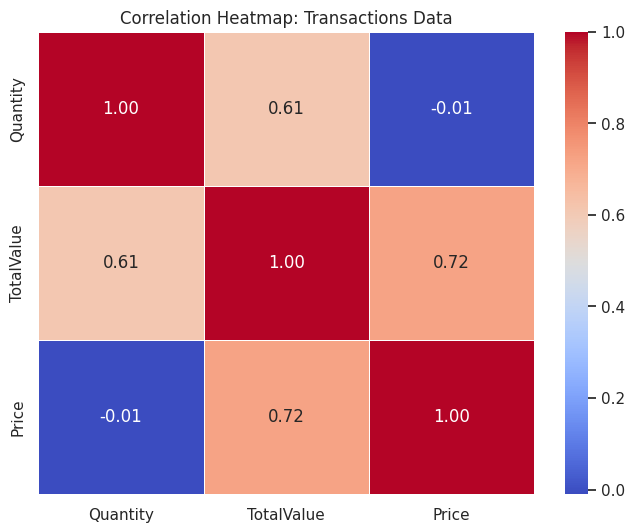

In [10]:
corr = transactions_df[['Quantity', 'TotalValue', 'Price']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Transactions Data")
plt.show()

In [11]:
category_revenue = transactions_df.merge(products_df, on="ProductID")
category_revenue = category_revenue.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

##Total Revenue by Product Category

<ipython-input-12-46b7aebce405>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_revenue.index, y=category_revenue.values, palette="muted")


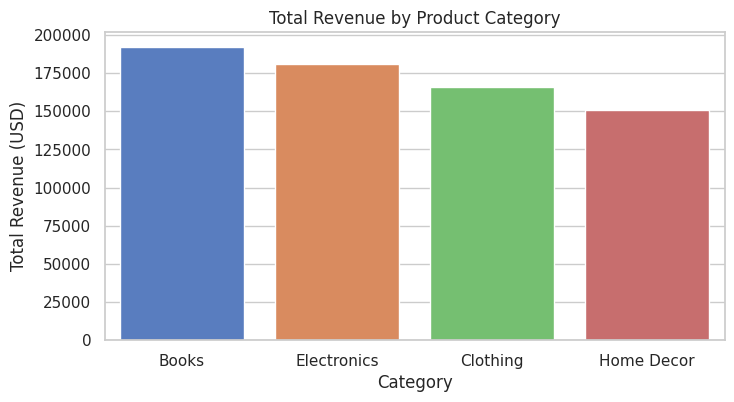

In [12]:
plt.figure(figsize=(8, 4))
sns.barplot(x=category_revenue.index, y=category_revenue.values, palette="muted")
plt.title("Total Revenue by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Revenue (USD)")
plt.show()

In [13]:
customer_transactions = transactions_df.merge(customers_df, on="CustomerID")
region_avg_spending = customer_transactions.groupby('Region')['TotalValue'].mean().sort_values(ascending=False)

##Average Spending per Transaction by Region

<ipython-input-14-6beb771915ac>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_avg_spending.index, y=region_avg_spending.values, palette="viridis")


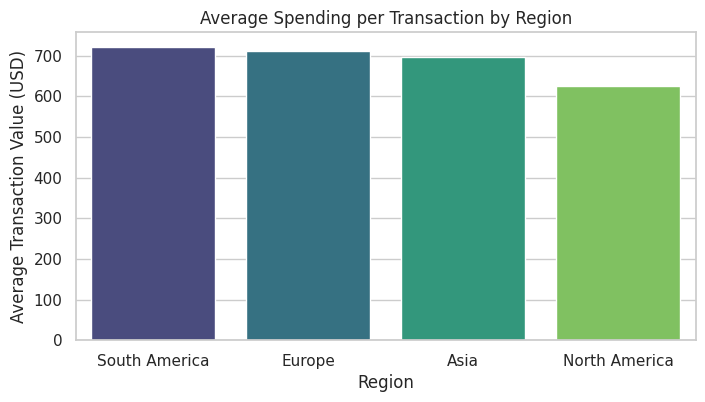

In [14]:
plt.figure(figsize=(8, 4))
sns.barplot(x=region_avg_spending.index, y=region_avg_spending.values, palette="viridis")
plt.title("Average Spending per Transaction by Region")
plt.xlabel("Region")
plt.ylabel("Average Transaction Value (USD)")
plt.show()

In [15]:
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

##Customer Signup Trends Over Time

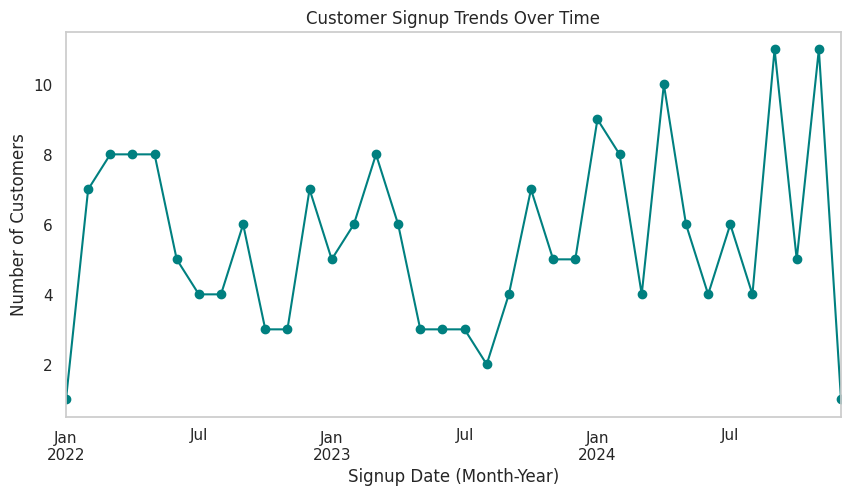

In [16]:
signup_trends = customers_df.groupby(customers_df['SignupDate'].dt.to_period('M')).size()
plt.figure(figsize=(10, 5))
signup_trends.plot(kind='line', marker='o', color='teal')
plt.title("Customer Signup Trends Over Time")
plt.xlabel("Signup Date (Month-Year)")
plt.ylabel("Number of Customers")
plt.grid()
plt.show()

##Transaction Volume Trends Over Time

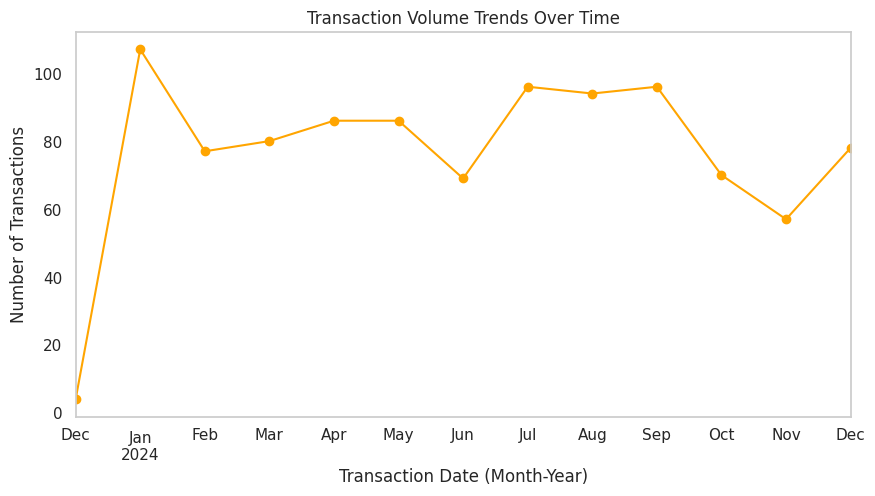

In [17]:
transaction_trends = transactions_df.groupby(transactions_df['TransactionDate'].dt.to_period('M')).size()
plt.figure(figsize=(10, 5))
transaction_trends.plot(kind='line', marker='o', color='orange')
plt.title("Transaction Volume Trends Over Time")
plt.xlabel("Transaction Date (Month-Year)")
plt.ylabel("Number of Transactions")
plt.grid()
plt.show()

##Top Products

In [18]:
top_products = category_revenue.reset_index().rename(columns={'TotalValue': 'Revenue'}).sort_values(by='Revenue', ascending=False)
print("Top 10 Products by Revenue:\n", top_products.head(10))

Top 10 Products by Revenue:
       Category    Revenue
0        Books  192147.47
1  Electronics  180783.50
2     Clothing  166170.66
3   Home Decor  150893.93


##Top Customers

In [19]:
top_customers = customer_transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Customers by Spending:\n", top_customers)


Top 10 Customers by Spending:
 CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64
